# Заревич Михаил 513-2

Вариант 169

## Анализ выборки


In [23]:
import pandas as pd
import scipy.stats
import statsmodels.graphics.gofplots
import matplotlib.pyplot as plt

In [24]:
# Уровни значимости Significance level
alphas = [0.005, 0.01, 0.05]

# Соответствующие им доверительные вероятноси Confidence level
gammas = [0.995, 0.99, 0.95]

In [25]:
# по умолчанию первая строчка csv файла записывается в заголовок колонки
# чтобы этого не было надо написать header = None
df = pd.read_csv("/content/v169.csv", header = None)

df = df.dropna() # убирает пропуски
df = df.sort_values(by = [0]).reset_index() # Сортировка значений
df = df.rename(columns={0: "Значения"})
df


,index,Значения
0,546,-4.052622
1,96,-3.782219
2,554,-3.273535
3,5851,-3.215289
4,471,-3.170771
...,...,...
4995,6098,3.465258
4996,3445,3.670848
4997,1117,3.672873
4998,4958,3.974495


In [26]:
# Значения разбросаны в диапазоне от -4.052622 до 4.055710.
# Диапазон можно разделить на 10 интервалов и посмотреть, сколько значений будет в каждом из них.
bins = pd.cut(df["Значения"], 10)
bins

,Значения
0,"(-4.061, -3.242]"
1,"(-4.061, -3.242]"
2,"(-4.061, -3.242]"
3,"(-3.242, -2.431]"
4,"(-3.242, -2.431]"
...,...
4995,"(3.245, 4.056]"
4996,"(3.245, 4.056]"
4997,"(3.245, 4.056]"
4998,"(3.245, 4.056]"


In [27]:
df["Интервалы"] = bins
df

,index,Значения,Интервалы
0,546,-4.052622,"(-4.061, -3.242]"
1,96,-3.782219,"(-4.061, -3.242]"
2,554,-3.273535,"(-4.061, -3.242]"
3,5851,-3.215289,"(-3.242, -2.431]"
4,471,-3.170771,"(-3.242, -2.431]"
...,...,...,...
4995,6098,3.465258,"(3.245, 4.056]"
4996,3445,3.670848,"(3.245, 4.056]"
4997,1117,3.672873,"(3.245, 4.056]"
4998,4958,3.974495,"(3.245, 4.056]"


In [28]:
# Группировка значений по интервалам.
temp = df.groupby('Интервалы')

# Группированный статистический ряд абсолютных частот.
Series = temp.agg({'Интервалы': 'count'})

print(Series)

                   Интервалы
Интервалы                   
(-4.061, -3.242]           3
(-3.242, -2.431]          36
(-2.431, -1.62]          213
(-1.62, -0.809]          746
(-0.809, 0.00154]       1475
(0.00154, 0.812]        1509
(0.812, 1.623]           768
(1.623, 2.434]           221
(2.434, 3.245]            23
(3.245, 4.056]             6


<ipython-input-28-d383092dd0ef>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('Интервалы')


In [29]:
# Группированный статистический ряд абсолютных частот.
Series = Series.rename(columns={"Интервалы": "Количество значений, попавших в интервал"})
temp = df['Интервалы'].unique()
Series["Интервалы"] = temp

Series

,"Количество значений, попавших в интервал",Интервалы
Интервалы,,
"(-4.061, -3.242]",3,"(-4.061, -3.242]"
"(-3.242, -2.431]",36,"(-3.242, -2.431]"
"(-2.431, -1.62]",213,"(-2.431, -1.62]"
"(-1.62, -0.809]",746,"(-1.62, -0.809]"
"(-0.809, 0.00154]",1475,"(-0.809, 0.00154]"
"(0.00154, 0.812]",1509,"(0.00154, 0.812]"
"(0.812, 1.623]",768,"(0.812, 1.623]"
"(1.623, 2.434]",221,"(1.623, 2.434]"
"(2.434, 3.245]",23,"(2.434, 3.245]"


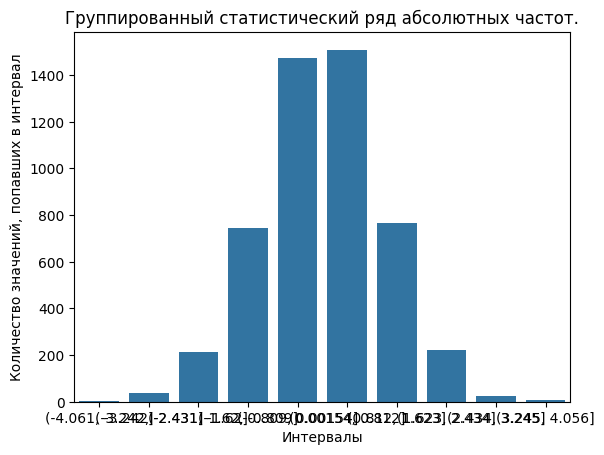

In [30]:
import seaborn as sns

x1 = Series["Интервалы"]
y = Series["Количество значений, попавших в интервал"]
sns.barplot(x=x1, y=y)
plt.title("Группированный статистический ряд абсолютных частот.")
plt.show()

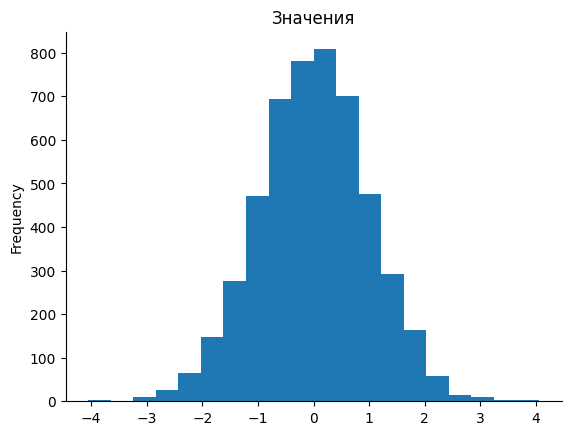

In [31]:
df['Значения'].plot(kind='hist', bins=20, title='Значения')
plt.gca().spines[['top', 'right',]].set_visible(False)

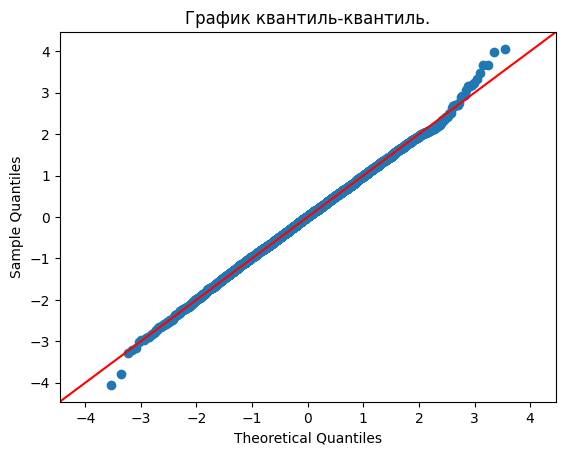

In [32]:
statsmodels.graphics.gofplots.qqplot(df["Значения"], scipy.stats.norm, line = "45")
plt.title("График квантиль-квантиль.")
plt.show()


In [33]:
print("Выборочное математическое ожидание: ", df["Значения"].mean())
print("Выборочная дисперсия: ", df["Значения"].var())
print("Выборочное ско: ", df["Значения"].std())
print("Выборочный коэффициент ассиметрии: ", df["Значения"].skew())
print("Выборочный эксцесс: ", df["Значения"].kurtosis())

Выборочное математическое ожидание:  0.006199145845556086
Выборочная дисперсия:  0.9730143456917733
Выборочное ско:  0.9864148953111835
Выборочный коэффициент ассиметрии:  -0.014846836903625062
Выборочный эксцесс:  0.15147786517018824


**Вывод.**

На основани вида графика и значений выборочных параметров можно выдвинуть гипотезу - случайная величина имеет стандартное нормальное распределение.

## Проверка гипотезы по гитерию Шапиро-Уилка

Не знаю, как тут указать параметры, чтобы проверялось именно стандартное распределение, а не произвольное.

In [34]:
scipy.stats.shapiro(df["Значения"])

ShapiroResult(statistic=np.float64(0.9994041999512644), pvalue=np.float64(0.10444373368490656))

**Вывод.**

Гипотеза принимается при всех заданных уровнях значимости.

## Проверка гипотезы по критерию Колмогорова-Смирнова

In [35]:
KSTest = scipy.stats.kstest(df["Значения"] , "norm", args = (0, 1))
print("Наблюдаемое значение критерия: ", KSTest[0])
print("P-значение: ", KSTest[1])


Наблюдаемое значение критерия:  0.010775597110358026
P-значение:  0.603166763686511


Проверка через наблюдаемое значение критерия.

In [36]:
print("Критические значения: ")
for i in gammas:
    print(scipy.stats.kstwo.ppf(i, len(df)))


Критические значения: 
0.024443073826368178
0.022983922603082615
0.019172751333714884


**Вывод.**

Гипотезу можно принять при любом уровне значимости, так как наблюдаемое значение критерия меньше критического значения для всех уровней значимости.

P-значение больше всех уровней значимости, следовательно гипотезу можно принять при любом из них.

## Проверка гипотезы по критерию хи-квадрат

Зададим вероятности попадания в интервалы.

In [37]:
# Normal distribution
# Нормальное распределение
NormDist = scipy.stats.norm()
ExpectedFrequencies = []

print("Вероятности: ")

for i in temp:
    # вероятность попадания в интервал.
    Pi = NormDist.cdf(i.right)- NormDist.cdf(i.left)
    print(Pi)
    ExpectedFrequencies.append(Pi*len(df))
print()
print("Частоты: ")
for i in ExpectedFrequencies:
    print(i)

Вероятности: 
0.0005690386263318178
0.006935137167966386
0.04508753117419574
0.15664143468225306
0.29135679773247275
0.2909898133843909
0.15610111331276832
0.04482820488963901
0.006879244425943454
0.0005622929886858197

Частоты: 
2.845193131659089
34.67568583983193
225.43765587097872
783.2071734112653
1456.7839886623638
1454.9490669219545
780.5055665638416
224.14102444819505
34.396222129717266
2.8114649434290984


In [38]:
print(scipy.stats.chisquare(Series["Количество значений, попавших в интервал"], ExpectedFrequencies, sum_check = False))

Power_divergenceResult(statistic=np.float64(12.38490648727235), pvalue=np.float64(0.19246940361452528))


In [39]:
a = scipy.stats.chi2(len(df)-1)
for i in alphas:
    #print(scipy.stats.chi2.ppf(i, len(df)))
    print(a.ppf(i))

4745.20030968622
4769.333735992841
4835.675940211096


**Вывод.**

Гипотеза принимается при всех уровнях значимости.